#### Importing necessary libraries for data analysis (Pandas, NumPy), visualization (Matplotlib, Seaborn),
#### data splitting (train_test_split), linear regression modeling (LinearRegression), and model evaluation (metrics)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------

#### Loading data from CSV file and creating a DataFrame

In [2]:
data = pd.read_csv('cardata.csv')

In [3]:
df = pd.DataFrame(data=data)

In [4]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------

#### Displaying descriptive statistics for all columns (including numeric and non-numeric)

In [6]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------

#### Dropping the 'Car_Name' column from the DataFrame

In [7]:
df.drop(columns=['Car_Name'], inplace=True)

In [8]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------

#### Creating 'Age' column by calculating car age based on (max year + 1)

In [9]:
maxint = df['Year'].max() + 1

In [10]:
df['Age'] = maxint - df['Year']

In [11]:
df2 = df.copy()

In [12]:
df2

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


------------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------------

#### Counting the number of missing (NaN) values in each column of DataFrame df2

In [13]:
df2.isna().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age              0
dtype: int64

In [14]:
df2['Kms_Driven'] = df2['Kms_Driven'].astype('int64')

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Age            301 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 21.3+ KB


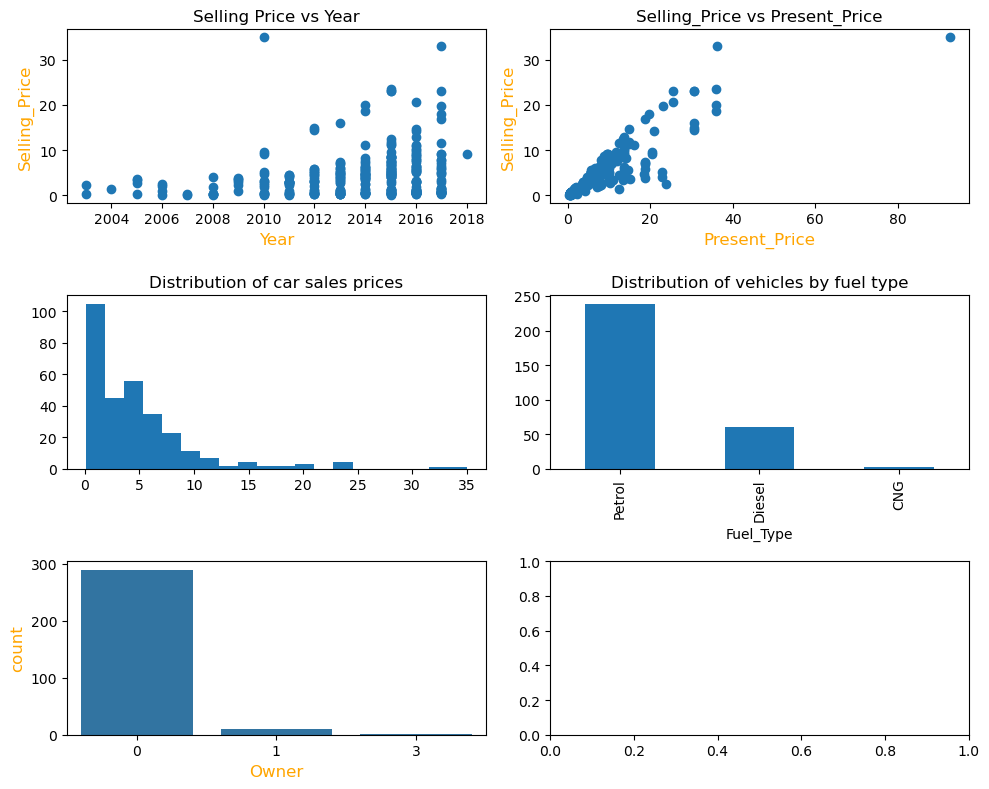

In [16]:
fig, ax = plt.subplots(3, 2, figsize=(10, 8))
ax[0, 0].scatter(df2['Year'], df2['Selling_Price'])
ax[0, 0].set_ylabel('Selling_Price', color='orange', fontsize=12)
ax[0, 0].set_xlabel('Year', color='orange', fontsize=12) 
ax[0, 0].set_title('Selling Price vs Year')
plt.tight_layout()

ax[0, 1].scatter(df2['Present_Price'], df2['Selling_Price'])
ax[0, 1].set_ylabel('Selling_Price', color='orange', fontsize=12)
ax[0, 1].set_xlabel('Present_Price', color='orange', fontsize=12)
ax[0, 1].set_title('Selling_Price vs Present_Price')
plt.tight_layout()


ax[1, 0].hist(df2['Selling_Price'], bins=20)
ax[1, 0].set_title('Distribution of car sales prices')
plt.tight_layout()

df2['Fuel_Type'].value_counts().plot(kind='bar', ax=ax[1, 1])
ax[1, 1].set_title('Distribution of vehicles by fuel type')
plt.tight_layout()

sns.countplot(x='Owner', ax=ax[2,0] , data=df2)
ax[2,0].set_ylabel('count', color='orange', fontsize=12)
ax[2,0].set_xlabel('Owner', color='orange', fontsize=12)
plt.tight_layout()

plt.show()

Sure! Here's the English version of your summary:

---

1. **Selling Price vs Year (Top-Left):**
   Newer cars (higher manufacturing years) generally have higher selling prices.
   However, there is considerable price variation even among newer cars, likely due to differences in model and features.

2. **Selling Price vs Present Price (Top-Right):**
   There is a relatively linear relationship between present price and selling price.
   Cars with higher current prices are usually sold at higher prices.

3. **Distribution of Car Sales Prices (Middle-Left):**
   Most cars are sold at prices below 10 units (likely million Toman or Lakh Rupees).
   The distribution is right-skewed, meaning high prices are rare.

4. **Distribution of Vehicles by Fuel Type (Middle-Right):**
   The majority of cars are Petrol, followed by Diesel, with very few CNG vehicles.
   This indicates a Petrol-dominated market in the dataset.

5. **Distribution by Owner Count (Bottom-Left):**
   Most cars have had only one previous owner (Owner = 0 possibly meaning new or first-hand vehicles).
   Cars with multiple previous owners are relatively rare.

---

### Overall Insights:

* **Year of manufacture** and **present price** significantly influence the **selling price**.
* The dataset is dominated by **Petrol vehicles** with **first-time ownership** and **lower selling prices**.
* Some features, such as selling price, exhibit **non-symmetric (right-skewed) distributions**.


---

---

In [17]:
df2['Price_Difference'] = df2['Present_Price'] - df2['Selling_Price']

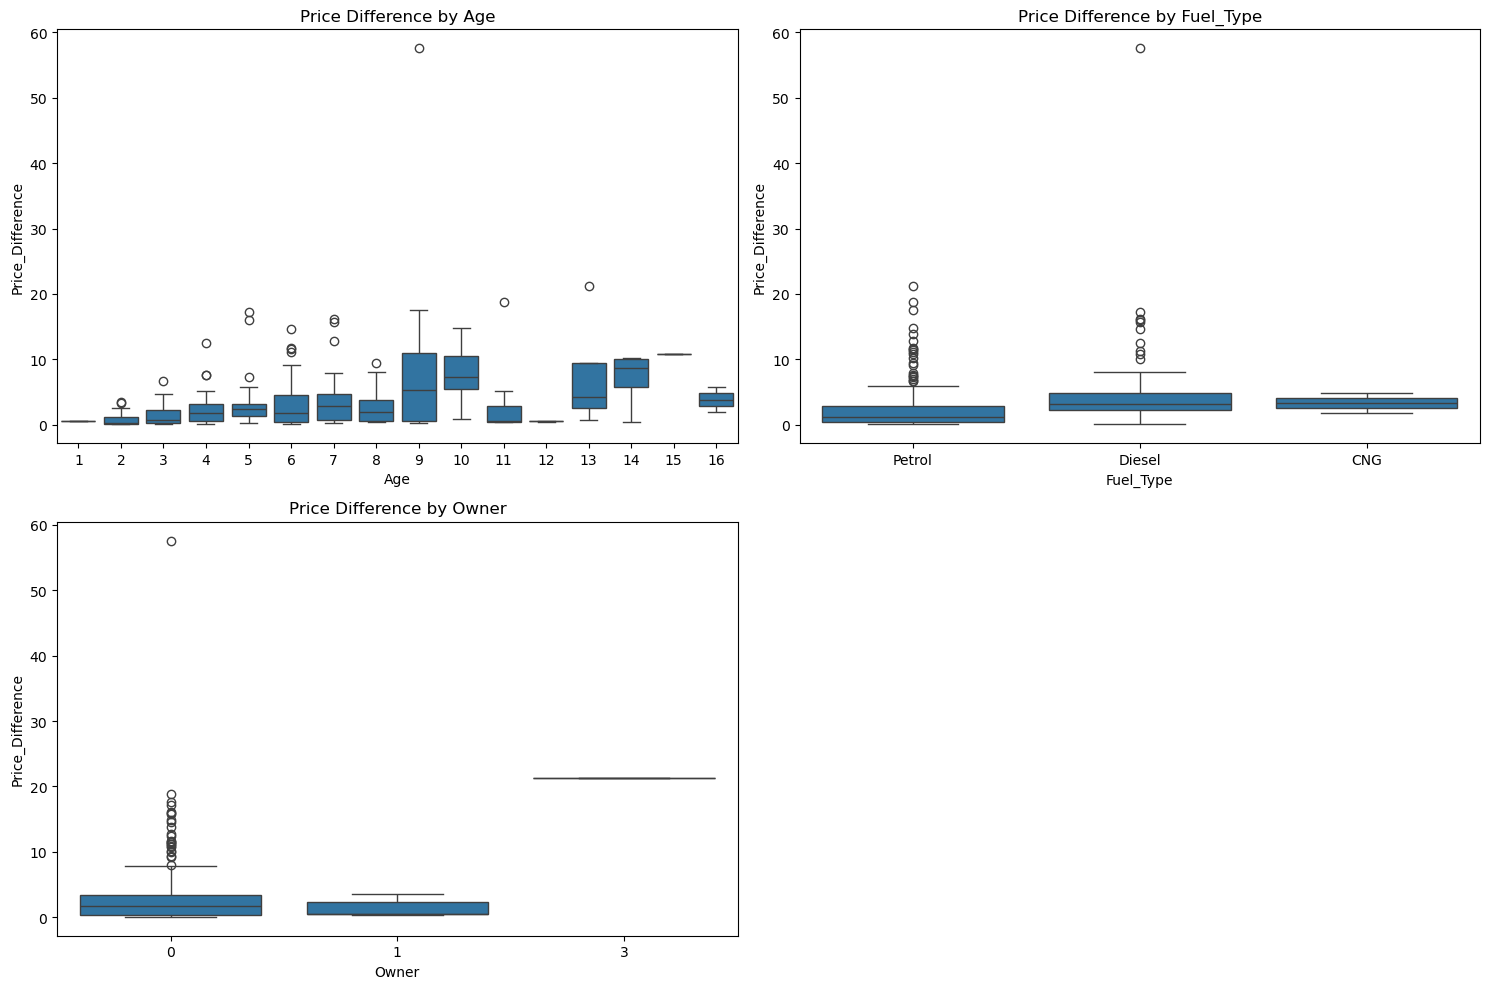

In [18]:
feature_lis = ['Age', 'Fuel_Type', 'Owner']

plt.figure(figsize=(15,10))

for index, feature in enumerate(feature_lis):
    plt.subplot(2, 2, index + 1)
    sns.boxplot(x=feature, y='Price_Difference', data=df2)
    plt.title(f'Price Difference by {feature}')
plt.tight_layout()
plt.show()

---

---

#### Dropping the 'Year' column from df2 as the car's age is already captured in the 'Age' column

In [19]:
df2.drop(['Year'], axis=1, inplace=True)

---

---

#### Defining a list of categorical columns for processing or encoding

In [20]:
Categorical = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

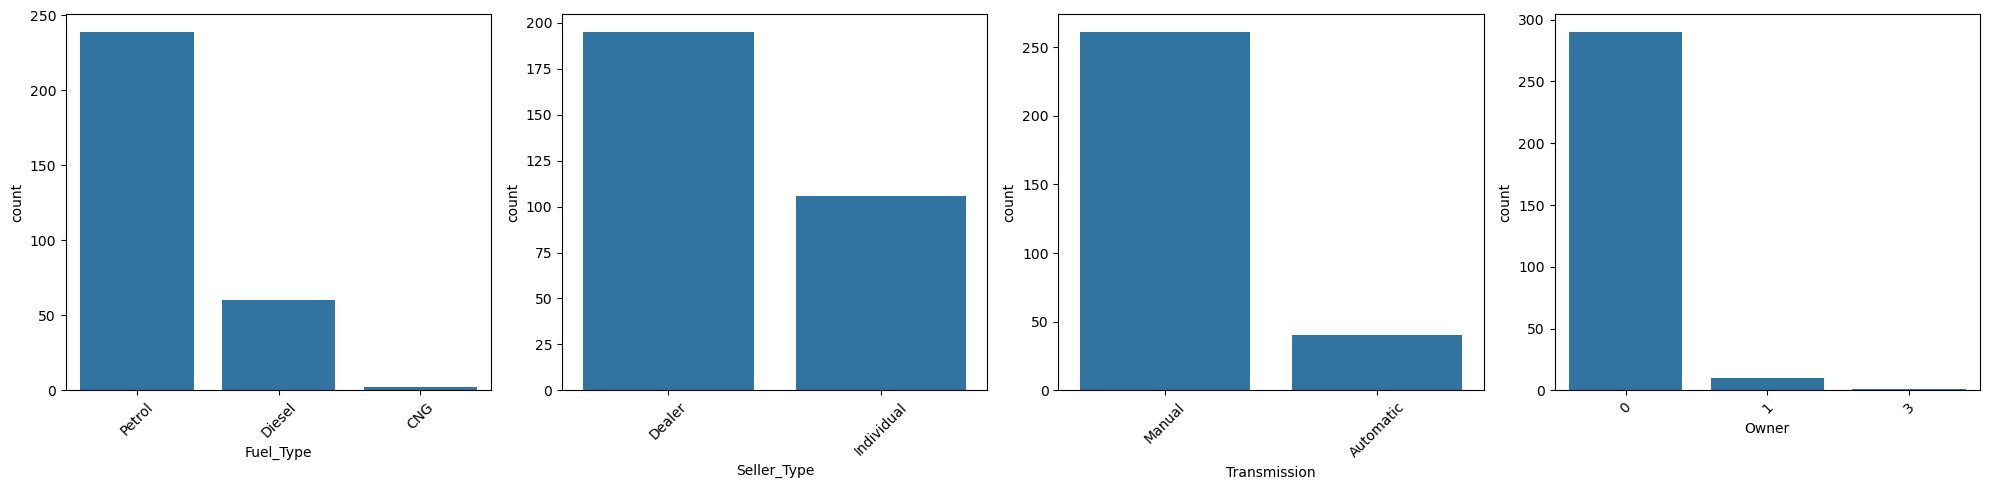

In [21]:
plt.figure(figsize=(20, 5))
for i, feature in enumerate(Categorical):
    plt.subplot(1,4,i+1)
    sns.countplot(x=feature, data=df2)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

---

---

Fuel_Type:

Most vehicles are Petrol.

A relatively smaller number of vehicles run on Diesel.

CNG vehicles are extremely rare.

✅ Conclusion: Petrol cars dominate the dataset.

---

Seller_Type:

The majority of sales are made by Dealers.

Individual sellers are fewer than dealers but still make up a significant portion.

✅ Conclusion: Dealers play a major role in vehicle sales.

---

Transmission:

Most vehicles have a Manual transmission.

Vehicles with Automatic transmission are much fewer.

✅ Conclusion: Manual transmission vehicles are more common in this market.

---

Owner:

Over 90% of vehicles have had only one previous owner (Owner = 0).

Vehicles with two or three previous owners are very rare.

✅ Conclusion: Most cars are first-hand or have only changed ownership once.

---

Final Summary:

Petrol, manual, and first-owner vehicles make up the majority of this dataset.

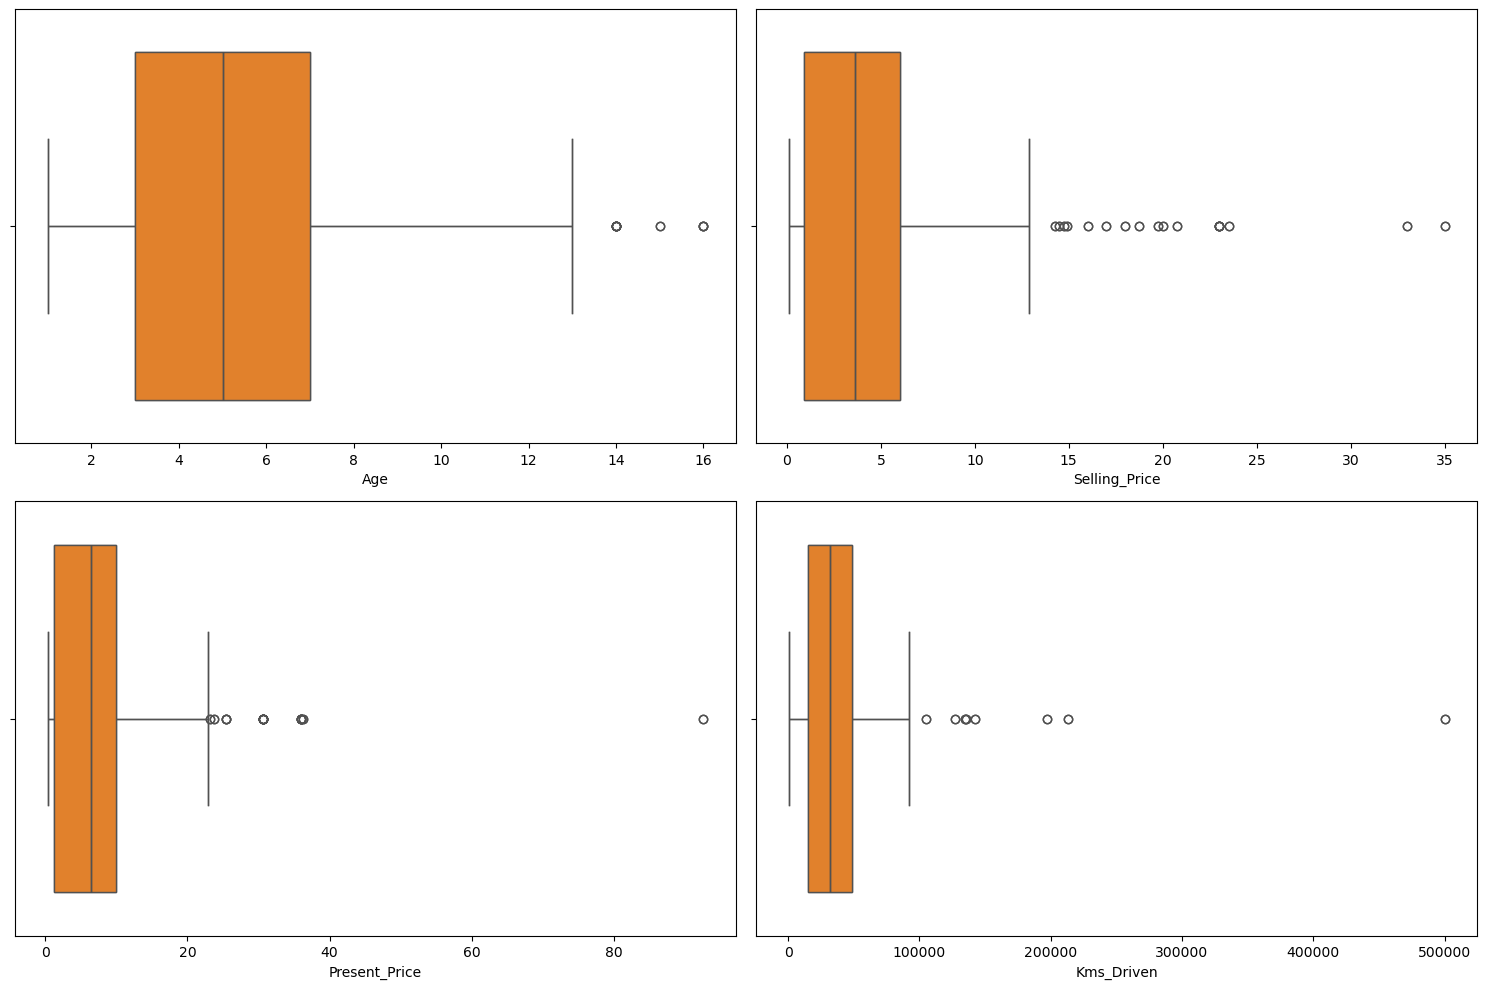

In [22]:
numerical = ['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven']
plt.figure(figsize=(15,10))
for i,feature in enumerate(numerical):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df2[feature],orient='x')
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df2[feature],orient='x')
    
plt.tight_layout()
plt.show()

---

---

Age (Car Age):

Most vehicles are between 1 to 10 years old.

A small number of very old cars exist, which appear as outliers on the right side.

✅ Conclusion: The dataset is dominated by relatively new vehicles; very old cars are rare.

---

Selling_Price:

The distribution of selling prices is right-skewed.

Most vehicles are sold at lower prices (under 10 units).

A few cars have very high selling prices, which are considered outliers.

✅ Conclusion: Selling prices are generally low, with only a few high-priced vehicles.

---

Present_Price:

Similar to selling price, the present price distribution is also right-skewed.

Most cars currently have a low value, but some are priced significantly higher.

✅ Conclusion: These high-priced cars are likely special models or luxury brands.

---

Kms_Driven:

The distribution of kilometers driven is also skewed and contains many outliers.

Most cars have reasonable mileage, but a few have been driven extremely high distances.

✅ Conclusion: Possible data entry errors or heavily-used vehicles should be investigated.

---

---

#### Identifying and removing noisy records with extremely high values in Present_Price, Selling_Price, or Kms_Driven
#### (Present_Price > 80, Selling_Price > 30, or Kms_Driven > 400,000)

In [23]:
df2[df2['Present_Price']>80]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Price_Difference
86,35.0,92.6,78000,Diesel,Dealer,Manual,0,9,57.6


In [24]:
df2[df2['Selling_Price']>30]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Price_Difference
64,33.0,36.23,6000,Diesel,Dealer,Automatic,0,2,3.23
86,35.0,92.60,78000,Diesel,Dealer,Manual,0,9,57.60


In [25]:
df2[df2['Kms_Driven']>400000]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Price_Difference
196,0.17,0.52,500000,Petrol,Individual,Automatic,0,11,0.35


In [26]:
noisy_records = pd.concat([df2[df2['Present_Price']>80],
        df2[df2['Selling_Price']>30],
        df2[df2['Kms_Driven']>400000]])

In [27]:
noisy_records.drop_duplicates(inplace=True)

In [28]:
noisy_records

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Price_Difference
86,35.00,92.60,78000,Diesel,Dealer,Manual,0,9,57.60
64,33.00,36.23,6000,Diesel,Dealer,Automatic,0,2,3.23
196,0.17,0.52,500000,Petrol,Individual,Automatic,0,11,0.35


array([[<Axes: title={'center': 'Present_Price'}>,
        <Axes: title={'center': 'Selling_Price'}>],
       [<Axes: title={'center': 'Kms_Driven'}>, <Axes: >]], dtype=object)

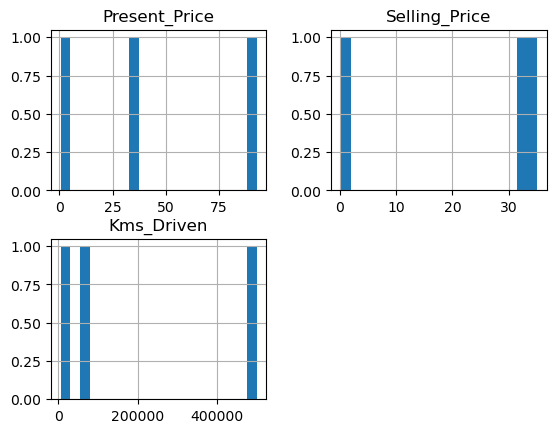

In [29]:
noisy_records.hist(column=['Present_Price', 'Selling_Price', 'Kms_Driven'], bins=20)

---

---

#### Creating a clean DataFrame (df3) by dropping noisy records identified earlier from df2

In [30]:
df3 = df2.drop(index=noisy_records.index, axis=0)

In [31]:
df3.reset_index(drop=True,inplace=True)

---

---

#### Replacing categorical string values with numeric codes for Fuel_Type, Seller_Type, and Transmission
#### (e.g., Petrol → 3, Diesel → 4, CNG → 5)

In [32]:
df3['Fuel_Type'] = df3['Fuel_Type'].replace({'Petrol':3, 'Diesel':4,'CNG':5})

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4936\3772545413.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Fuel_Type'] = df3['Fuel_Type'].replace({'Petrol':3, 'Diesel':4,'CNG':5})


In [33]:
df3['Seller_Type'] = df3['Seller_Type'].replace({'Dealer':3, 'Individual':4})

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4936\3663603490.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Seller_Type'] = df3['Seller_Type'].replace({'Dealer':3, 'Individual':4})


In [34]:
df3['Transmission'] = df3['Transmission'].replace({'Manual':3, 'Automatic':4})

C:\Users\lenovo\AppData\Local\Temp\ipykernel_4936\3460138206.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3['Transmission'] = df3['Transmission'].replace({'Manual':3, 'Automatic':4})


In [35]:
df3.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Age', 'Price_Difference'],
      dtype='object')

---

---

#### Selecting input features and target variable for car price prediction

In [36]:
x = df3[['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Age']]
y = df3['Selling_Price'].values.reshape(-1, 1)

In [37]:
print(x.shape)
print(y.shape)

(298, 7)
(298, 1)


---

---

#### Splitting data into training (80%) and testing (20%) sets with a fixed random state for reproducibility

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

---

---

#### Creating a Linear Regression model instance

In [39]:
model = LinearRegression()

---

---

#### Training the Linear Regression model on the training data

In [40]:
model.fit(x_train, y_train)

LinearRegression()

---

---

#### Predicting target values for the test set using the trained model

In [41]:
y_pred = model.predict(x_test)

In [42]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)
print(y_pred.shape)

(60, 7)
(238, 7)
(60, 1)
(238, 1)
(60, 1)


---

---

#### Evaluating model performance using MAE, MSE, RMSE, and R² score

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean_Squared_Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2_Score:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.1827621640222965
Mean_Squared_Error: 3.1059616126524228
Root Mean_Squared_Error: 1.7623738572313261
R2_Score: 0.8835819326227259


---

---

#### Creating a DataFrame to compare actual and predicted values

In [44]:
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [45]:
comparison

,Actual,Predicted
0,0.60,0.255031
1,11.25,8.665732
2,23.00,19.167248
3,0.45,2.176631
4,3.75,3.745928
5,3.90,4.347766
6,8.65,8.514610
7,18.75,20.543480
8,6.00,4.651588
9,0.95,0.952955


---

---

#### Importing functions for performing K-Fold cross-validation

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

---

---

#### Performing 10-fold cross-validation on the model and printing the accuracy scores for each fold

In [47]:
k_fold = KFold(10)
print(cross_val_score(model, x, y.ravel(), cv=k_fold,n_jobs=1))

[ 7.73267729e-01  8.91122185e-01  7.30522973e-01  8.63163031e-01
 -4.39376480e+01 -8.91450457e+02  5.73896153e-01  7.85533643e-01
  8.65254737e-01  8.84769232e-01]


In [48]:
len(df2)/10

30.1

---

---

#### Removing rows with indices from 120 to 181 and resetting the index of the resulting DataFrame

In [49]:
data1 = df3[df3.index<120]
data2 = df3[df3.index>181]
data3 = pd.concat([data1,data2],ignore_index=True)
data3.reset_index(drop=True, inplace=True)

In [50]:
data3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age,Price_Difference
0,3.35,5.59,27000,3,3,3,0,5,2.24
1,4.75,9.54,43000,4,3,3,0,6,4.79
2,7.25,9.85,6900,3,3,3,0,2,2.60
3,2.85,4.15,5200,3,3,3,0,8,1.30
4,4.60,6.87,42450,4,3,3,0,5,2.27
...,...,...,...,...,...,...,...,...,...
231,9.50,11.60,33988,4,3,3,0,3,2.10
232,4.00,5.90,60000,3,3,3,0,4,1.90
233,3.35,11.00,87934,3,3,3,0,10,7.65
234,11.50,12.50,9000,4,3,3,0,2,1.00


---

---

#### Selecting input features and target variable for car price prediction

In [51]:
x2 = data3[['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Age']]
y2 = data3['Selling_Price'].values.reshape(-1, 1)

---

---

#### Splitting data into training (80%) and testing (20%) sets with a fixed random state for reproducibility

In [52]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.2, random_state=0)

---

---

#### Creating a Linear Regression model instance

In [53]:
model3 = LinearRegression()

---

---

#### Training the Linear Regression model on the training data

In [54]:
model3.fit(x_train2, y_train2)

LinearRegression()

---

---

#### Predicting target values for the test set using the trained model

In [55]:
y_pred3 = model3.predict(x_test2)

---

---

#### Evaluating model performance using MAE, MSE, RMSE, and R² score

In [56]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test2, y_pred3))
print('Mean_Squared_Error:', metrics.mean_squared_error(y_test2, y_pred3))
print('Root Mean_Squared_Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred3)))
print('R2_Score:', metrics.r2_score(y_test2, y_pred3))

Mean Absolute Error: 0.9439120078953492
Mean_Squared_Error: 1.55262297862163
Root Mean_Squared_Error: 1.2460429280813843
R2_Score: 0.9315874970346788


In [57]:
print(model3.intercept_)

[0.00477039]


In [58]:
print(model3.coef_)

[[ 5.26548777e-01 -2.09352877e-05  1.26602869e+00 -7.52619932e-01
   4.88794630e-01 -9.65657934e-01 -3.07946244e-01]]


---

---

#### Inserting actual and predicted target values into the test DataFrame,
#### sorting it by 'Present_Price', and assigning columns to variables for further analysis or plotting

In [59]:
x_test2.insert(0, 'y_test', y_test2)

In [60]:
x_test2.insert(0, 'y_pred', y_pred3)

In [61]:
New_df = x_test2.sort_values(by=['Present_Price'])

In [62]:
a = New_df.Present_Price
b = New_df.y_test
c = New_df.Present_Price
d = New_df.y_pred

---

---

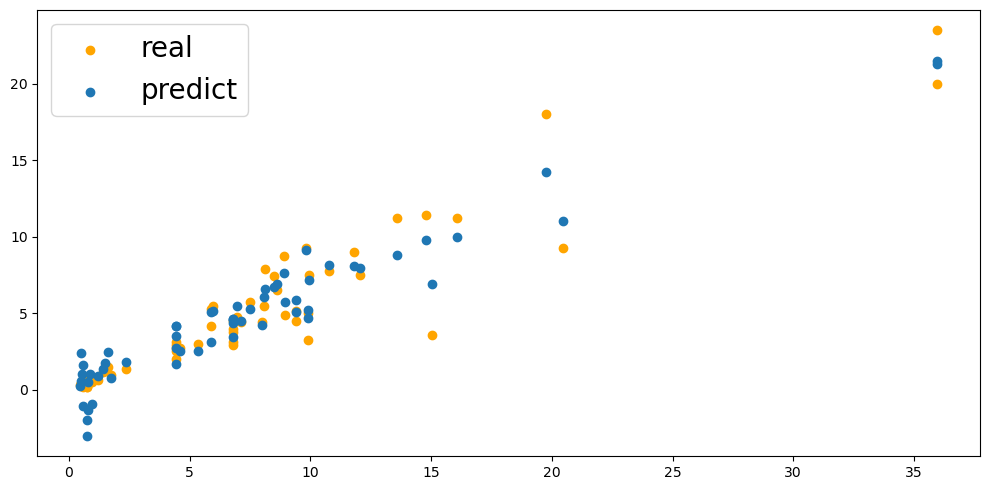

In [63]:
plt.figure(figsize=(10, 5))
plt.scatter(a, b, color='orange', label='real')
plt.scatter(c, d, label='predict')
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

---

---

* The overall trend between the real and predicted values is quite similar, especially in the lower range (x between 0 and 15).
---
* In higher values (x > 20), the difference between predicted and real values increases, indicating a drop in model accuracy for outliers or data outside the training range.
---
* Most data points are clustered around the hypothetical line *y = x* (real value = predicted value), which reflects good model performance in the main data range.

#### Age: 10
#### Present_Price: 11.23
#### Kms_Driven: 42/000
#### Fuel_Type: petrol
#### Seller_Type: Dealer
#### Transmission: manual
#### Owner: 1
# Selling_Price: ?

    Present_Price 	Kms_Driven 	Fuel_Type 	Seller_Type 	Transmission 	Owner 	Age

## Test

In [64]:
y_pred3 = model3.predict([[11.23,42000,3,3,3,1,10]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [65]:
y_pred3

array([[4.00012086]])